### Oil Price and Total Shipment Visualization

Oil price data is obtained from (__[U.S Energy Information Administration, 2022](https://www.eia.gov/international/rankings/world)__), specifically for the Europe Brent Spot Price Free on Board (FOB) measured in USD Dollar per Barrel. The graph will also show total shipment data in the Netherlands measured in 10million tonnes. 

Visualization will be using line graphs to see the trend of oil price and total shipment over time, and using scatter plot to see the correlation of oil price and total shipment.

Import data from datasets:

In [48]:
# Importing dataframe that will be used for the visualization

# Import libraries
import pandas as pd              #used for reading excel dataframe
import plotly.graph_objs as go   #used for visualizing line graphs
import matplotlib.pyplot as plt  #used for plotting scatter graphs
import seaborn as sns            #used for plotting scatter graphs to include confidence intervals


#Import excel file as dataframe; only use year, price, and total shipment column
df = pd.read_excel('Summarized Data.xlsx', usecols=['Quarter', 'Price', 'Total Shipment']) 

#Transpose dataframe for table visualization
df.T    

,0,1,2,3,4,5,6,7,8,9,10,11
Quarter,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4
Price,60.82,68.83,73.47,79.59,100.3,113.54,100.71,88.56,81.17,78.32,86.66,83.72
Total Shipment,41.379452,43.594191,40.797157,42.365829,41.963318,43.576563,39.67938,41.890035,39.838667,40.17454,36.950964,38.624361


Create line graphs to see the trend of oil price and total shipment over time.

In [49]:
# Create line graph for visualize the trend of oil price and total shipment per quarter between 2021 and 2023

# Create figure
fig = go.Figure()

# Add Oil Price visualization on primary y-axis
fig.add_trace(go.Scatter(
    x = df['Quarter'],
    y = df['Price'],
    name = 'Oil price (USD per barrel)',
    line = dict(color = 'blue', dash = 'solid'),
    mode = 'lines',
    yaxis = 'y1' # Link the data to primary y-axis (y1)
))

# Add Total Shipment visualization
fig.add_trace(go.Scatter(
    x = df['Quarter'],
    y = df['Total Shipment'],
    name = 'Total Shipment (10 million ton)',
    line = dict(color = 'orange', dash = 'solid'),
    mode = 'lines',
    yaxis = 'y2' # Link to the secondary y-axis (y2)
))


# Define the y-axis ranges based on dataframe
y1_min = df['Price'].min() - 5
y1_max = df['Price'].max() + 5

# Make sure the secondary y-axis is proportionate to primary y-axis
y2_min = (y1_min / 2)                       
y2_max = (y1_max / 2)


# Set up the graph layout with dual y-axes
fig.update_layout(
    title = 'Trend of Oil Price and Shipment Quantity from 2021 to 2023',
    xaxis = dict(
        title = 'Year, quarter',
        showgrid = True,
        tickangle = 45
    ),
    yaxis = dict(
        title = 'Oil Price',
        showgrid = True,
        range = [y1_min, y1_max]
    ),
    yaxis2 = dict(
        title = 'Total Shipment',
        overlaying = 'y',  # Overlay it on the primary y-axis
        side = 'right',    # Place it on the rightside of the graph
        showgrid = False,  # Hide grid to avoid clash with primary y-axis
        range = [y2_min, y2_max]
    ),
    legend_title_text = 'Legend',
    legend = dict(
        x = 1.1,           # Move legend outside to the right
        y = 1,             # Align legend to the top
        xanchor = 'left',  # Position the legend starting from the left
        yanchor = 'top',   # Align it with the top of the graph
        orientation = 'v'  # Set legend vertically
    ),
    hovermode = 'x unified'
)

fig.show()


Create a scatter plot graphs to find out the correlation between oil price and total shipment

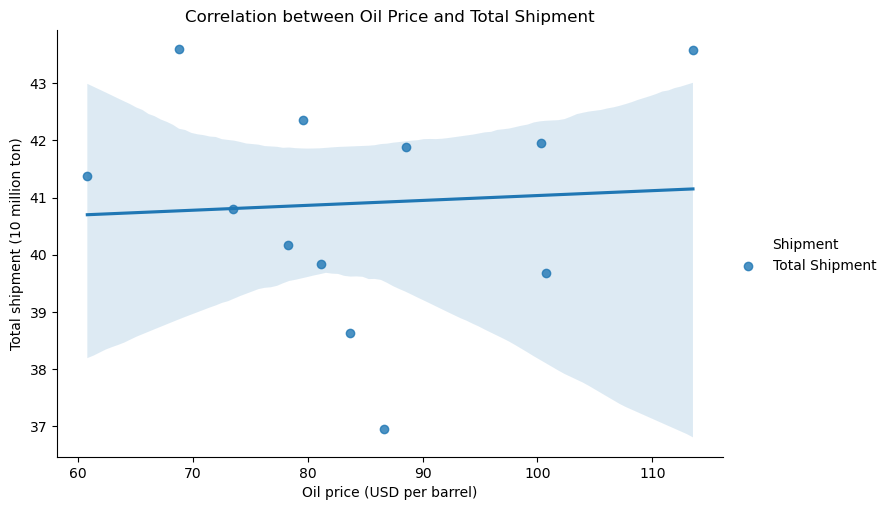

In [50]:
# Create scatter plot to visualize the correlation between oil price and total shipment

# Create new dataframe to be visualized using seaborn
new_df = df.melt(id_vars = ['Price'], 
                value_vars = ['Total Shipment'],
                var_name = 'Shipment', 
                value_name = 'Volume')

# Set up the scatter plot of total shipping volumes against the oil price
sns.lmplot(
    data = new_df,
    x = 'Price',
    y = 'Volume',
    hue = 'Shipment',
    aspect = 1.5,
)

# Set up the axes titles
plt.title('Correlation between Oil Price and Total Shipment')
plt.xlabel('Oil price (USD per barrel)')
plt.ylabel('Total shipment (10 million ton)')

plt.show()